In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

## Confusion Matrix + Metrics

pretrain: "20200623-121727/" \
scratch: "20200624-200732/" \
direct: "20200626-102621/" \
dense: "20200624-204753/" \
recurrent: "20200624-221759/" \
cnn: "20200624-223732/" \
complete: "20200625-024259/"

In [20]:
tl_stage = "pretrain" #pretrain, scratch, direct, dense, recurrent, cnn, complete
folder = "C:/Users/sa6pr7/Desktop/Implementierung/Transfer_Learning/results_final/"
results = "20200623-121727/"
result_folder = folder + results

In [21]:
#load the classwise evaluation metrics from the result folder
metrics_path = result_folder + "classwise_scoring.json"

with open(metrics_path) as json_file:
    metrics = json.load(json_file)
    
print(metrics)

{'N1': {'precision': 0.5189374013677012, 'recall': 0.28946596244131456, 'f1-score': 0.37163307590883404, 'support': 6816}, 'N2': {'precision': 0.7568154879494271, 'recall': 0.8118675496688742, 'f1-score': 0.7833755080131891, 'support': 18875}, 'N3': {'precision': 0.8562091503267973, 'recall': 0.4560928433268859, 'f1-score': 0.5951539626451288, 'support': 5170}, 'R': {'precision': 0.6887785501489573, 'recall': 0.6620847651775487, 'f1-score': 0.6751679158960381, 'support': 5238}, 'W': {'precision': 0.6064453125, 'recall': 0.8918471056120194, 'f1-score': 0.7219638705061706, 'support': 9052}, 'accuracy': 0.6909260038537353, 'macro avg': {'precision': 0.6854371804585766, 'recall': 0.6222716452453285, 'f1-score': 0.6294588665938722, 'support': 45151}, 'weighted avg': {'precision': 0.6942467715972508, 'recall': 0.6909260038537353, 'f1-score': 0.6748013608846797, 'support': 45151}}


In [22]:
#load the confusion matrix from the result folder
cm_path = result_folder + "confusion_matrix.json"

with open(cm_path) as json_file:
    cm = json.load(json_file)
    
print(cm)

[[1973, 1082, 0, 573, 3188], [1026, 15324, 396, 701, 1428], [2, 2675, 2358, 72, 63], [537, 673, 0, 3468, 560], [264, 494, 0, 221, 8073]]


In [23]:
# get the labels
labels = list(metrics.keys())[:5]
print(labels)

['N1', 'N2', 'N3', 'R', 'W']


In [24]:
results_path = "C:/Users/sa6pr7/Desktop/Bachelorarbeit/Bilder/Ergebnisse/"

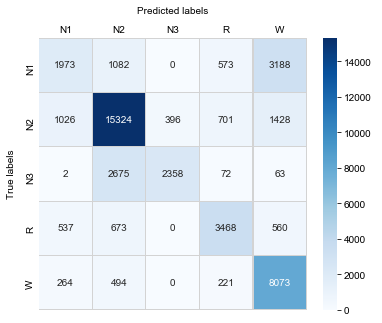

In [25]:
# plot the confusion matrix and save to file
plt.figure(figsize = (6,5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',linewidths=0.1, linecolor='lightgrey')
sns.set()

# labels, title and ticks
ax.set_xlabel('Predicted labels', labelpad=12)
ax.set_ylabel('True labels', labelpad=10)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.tick_params(length=0)

file_name_cm = "cm_" + tl_stage + ".png"
cm_path_result = results_path + file_name_cm
#plt.savefig(cm_path_result)

In [26]:
# make dataframe of the metrics
df_cm = pd.DataFrame(cm, columns=labels, index=labels)
df_cm

,N1,N2,N3,R,W
N1,1973,1082,0,573,3188
N2,1026,15324,396,701,1428
N3,2,2675,2358,72,63
R,537,673,0,3468,560
W,264,494,0,221,8073


In [27]:
# swap labels and metrics
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.transpose()
df_metrics

,precision,recall,f1-score,support
N1,0.518937,0.289466,0.371633,6816.000000
N2,0.756815,0.811868,0.783376,18875.000000
N3,0.856209,0.456093,0.595154,5170.000000
R,0.688779,0.662085,0.675168,5238.000000
W,0.606445,0.891847,0.721964,9052.000000
accuracy,0.690926,0.690926,0.690926,0.690926
macro avg,0.685437,0.622272,0.629459,45151.000000
weighted avg,0.694247,0.690926,0.674801,45151.000000


In [28]:
# drop common metrics
df_metrics = df_metrics.drop(['accuracy', 'macro avg', 'weighted avg'])
df_metrics

,precision,recall,f1-score,support
N1,0.518937,0.289466,0.371633,6816.0
N2,0.756815,0.811868,0.783376,18875.0
N3,0.856209,0.456093,0.595154,5170.0
R,0.688779,0.662085,0.675168,5238.0
W,0.606445,0.891847,0.721964,9052.0


In [97]:
# write to excel. Every run gets its own sheet.
sheet_path = results_path + 'Metrics.xlsx'
sheet_name = tl_stage
if tl_stage == "pretrain":
    with pd.ExcelWriter(sheet_path) as writer:  
        df_metrics.to_excel(writer, sheet_name=sheet_name)
else:
    with pd.ExcelWriter(sheet_path, mode='a') as writer:  
        df_metrics.to_excel(writer, sheet_name=sheet_name)

## Learning Curve 

**Training** \
pretrain: "20200618-195701/" \
scratch: "20200623-173545/" \
dense: "20200623-225402/" \
recurrent: "20200624-011223/" \
cnn: "20200624-035201/" \
complete: "20200624-082145/" \
\
**Evaluation** \
pretrain: "20200623-121727/" \
scratch: "20200624-200732/" \
direct: "20200626-102621/" \
dense: "20200624-204753/" \
recurrent: "20200624-221759/" \
cnn: "20200624-223732/" \
complete: "20200625-024259/"

In [109]:
tl_stage = "complete" #pretrain, scratch, direct, dense, recurrent, cnn, complete
folder = "C:/Users/sa6pr7/Desktop/Implementierung/Transfer_Learning/results_final/"

train_history_path = folder + "20200624-082145/" + "training_history.json"
eval_history_path = folder + "20200625-024259/" + "training_history.json"
metrics_folder = folder + "20200625-024259/" + "classwise_scoring.json"

In [110]:
with open(train_history_path) as json_file:
    train_history = json.load(json_file)
    
with open(eval_history_path) as json_file:
    eval_history = json.load(json_file)
    
print(train_history.keys())
print(eval_history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['loss', 'accuracy'])


In [111]:
results_path = "C:/Users/sa6pr7/Desktop/Bachelorarbeit/Bilder/Ergebnisse/"

In [112]:
# get the accuracy on the test set
with open(metrics_folder) as json_file:
    metrics = json.load(json_file)
    
test_acc = metrics['accuracy']

num_epochs_eval = len(eval_history['accuracy']) - 1

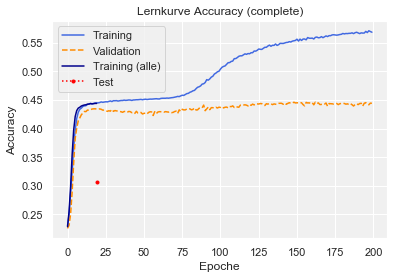

In [113]:
# plot accuracy history
plt.rcParams['axes.facecolor'] = '#f0f0f0'

plt.plot(train_history['accuracy'], linestyle='-', color="royalblue")
plt.plot(train_history['val_accuracy'], linestyle='--', color="darkorange")
plt.plot(eval_history['accuracy'], linestyle='-', color="darkblue")

# add marker for the accuracy on the test set
plt.plot([num_epochs_eval], [test_acc], marker='o', markersize=3, color="red", linestyle=':')

# Titel = Stufe
title = 'Lernkurve Accuracy (' + tl_stage + ')'
plt.title(title)
plt.ylabel('Accuracy')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validation', 'Training (alle)', 'Test'], loc='best')

# save to png
file_name_acc = "history_acc_" + tl_stage + ".png"
acc_path_result = results_path + file_name_acc
plt.savefig(acc_path_result)

plt.show()

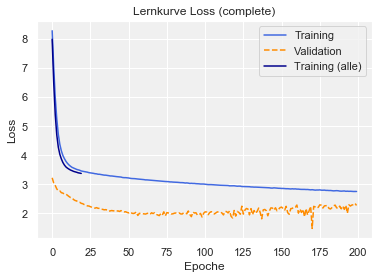

In [114]:
# plot loss history
plt.rcParams['axes.facecolor'] = '#f0f0f0'

plt.plot(train_history['loss'], linestyle='-', color="royalblue")
plt.plot(train_history['val_loss'], linestyle='--', color="darkorange")
plt.plot(eval_history['loss'], linestyle='-', color="darkblue")

# Titel = Stufe
title = 'Lernkurve Loss (' + tl_stage + ')'
plt.title(title)
plt.ylabel('Loss')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validation', 'Training (alle)'], loc='best')

# save to png
file_name_loss = "history_loss_" + tl_stage + ".png"
loss_path_result = results_path + file_name_loss
plt.savefig(loss_path_result)

plt.show()

## Model Plot

In [1]:
path_img = "keras_model_graph.png"
from keras.utils.vis_utils import plot_model
from keras.models import load_model

In [2]:
model = load_model("C:/Users/sa6pr7/PycharmProjects/medical-icu/src/transferlearning/trained_models/pretrained_model.hdf5")

In [3]:
plot_model(model=model, to_file=path_img, show_shapes=False, show_layer_names=False, dpi=300)